# Семинар 9. Numpy_3 (решение задач)

1. Найти длину ломаной линии


2. Сгенерировать шахматную доску размера NxN с ячейками размера MxM


3. Построить триангуляцию области заданной формы

    3.1. Вычислить центры и площади треугольников
    
    3.2. Удалить треугольники по условию


4. Какое преобразование пространства задает линейный оператор с симметричной матрицей (2х2)?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Найти длину ломаной линии

Часто встречаются задачи, где функцию невозможно задать аналитически, а только вычислить ее в некоторых точках численно. В этом случае мы имеем дело с функцией, заданной таблично. График функции в этом случае строится как график кусочно-линейной функции, т.е. упорядоченный набор отрезков, соединяющих предыдущую точку со следующей. **Как вычислить длину такой линии, не прибегая к циклам Python**?


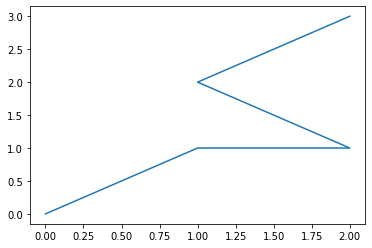

In [22]:
arr = np.array([[0.0, 0.0],
                [1.0, 1.0],
                [2.0, 1.0],
                [1.0, 2.0],
                [2.0, 3.0]])

plt.plot(arr[:, 0], arr[:, 1])

In [23]:
3*2**0.5 + 1

5.242640687119286

In [24]:
arr[1] - arr[0]
arr[2] - arr[1]
arr[3] - arr[2]

array([-1.,  1.])

In [25]:
arr.shape

(5, 2)

In [26]:
arr[:-1]

array([[0., 0.],
       [1., 1.],
       [2., 1.],
       [1., 2.]])

In [29]:
r0 = 3*2**0.5 + 1

In [30]:
r1 = np.sum(np.sum((arr[1:] - arr[:-1])**2, axis=1)**0.5)
r1

5.242640687119285

In [31]:
r2 = np.linalg.norm(arr[1:] - arr[:-1], axis=1).sum()

In [32]:
abs(r0 - r1)

8.881784197001252e-16

In [33]:
abs(r0 - r2)

8.881784197001252e-16

## 2. Сгенерировать шахматную доску размера NxN с ячейками размера MxM

Задача, которую можно решить различными способами. В ней можно проявить ваш творческий потенциал.

In [ ]:
# 010101
# 101010
# 010101
# 101010

In [ ]:
# 000...0111...1000...0... (N)
#   M        M       M

In [ ]:
# 000...0111...1222...2333...3...

In [35]:
0 // 3, 1 // 3, 2 // 3, 3 // 3, 4 // 3, 5 // 3 

(0, 0, 0, 1, 1, 1)

In [63]:
N, M = 19, 4

In [64]:
(np.arange(N) // M) % 2

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int32)

In [69]:
x = np.arange(2, N+2) // M
y = np.arange(3, N+3) // M
x

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5],
      dtype=int32)

In [70]:
if np.newaxis is None:
    print('None')

None


In [72]:
M = (x[:, None] + y) % 2
M

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0,

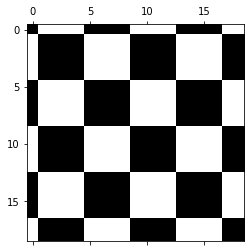

In [81]:
N, M = 19, 4
dx, dy = -1, 3
x = np.arange(dx, N+dx) // M
y = np.arange(dy, N+dy) // M
A = (x[:, None] + y) % 2
plt.spy(A)

## 3. Построить триангуляцию области заданной формы

Такая задача встречается при решении различных задач методом конечных элементов. В этом методе искомая непрерывная функция заменяется на сумму кусочных функций, определенных на отдельных элементах. Исходная область может быть сложной формы, в то время как каждый элемент имеет простую форму (например, треугольник).

Пусть задана прямоугольная область с круглым вырезом.
Для разбиения на треугольники будем использовать метод триангуляции Делоне. Реализация этого метода присутствует в библиотеке `scipy.spatial`.

Для построения такой триангуляции необходимо:
- построить разбиение границы
- сгенерировать внутренние узлы
- применить реализацию метода Делоне

## 3.1. Вычислить центры и площади треугольников

Разброс площадей треугольников характеризует качество триангуляции.

Центры треугольников необходимы для удаления лишних треугольников.

## 4. Какое преобразование пространства задает линейный оператор с симметричной матрицей (2х2)?

## 5. Решение задачи [`Four to the floor`](https://py.checkio.org/en/mission/four-to-the-floor/)


Необходимо написать функцию `is_covered(room, sensors)`, параметрами которой являются:
- `room` - размеры прямоугольной комнаты (список из двух чисел)
- `sensors` - координаты и радиусы действия датчиков (список из списков по 3 числа)

Функция должна вернуть `True`, если комната полностью просматривается сенсорами, иначе - `False`.

In [97]:
# [[x0 y0 r0],
#  [x1,y1,r1],
# ...
# ]

from numba import njit

@njit(fastmath = True)
def surface(point, sensors):
    v = sensors[:, :2] - point
    d = np.sum(v**2, axis=1)**0.5
    return np.max(sensors[:,-1] - d)

In [98]:
from scipy.optimize import minimize

In [109]:
def is_covered(room, sensors):
    W, H = room
    sensors = np.array(sensors)
    
    bounds = ((0, W), (0, H))
    N = 20
    rng = np.random.default_rng()
    pts = np.column_stack((rng.uniform(0, W, size=N),
                           rng.uniform(0, H, size=N)))
    
    for p in pts:
        res = minimize(surface, p, args = (sensors,), 
                       method = 'SLSQP', bounds = bounds, tol=1e-2)
        
        if res.fun < 0:
            return False
        
    return True

In [86]:
from fttf_tests import TESTS

(0, 0) 5
(0, 850) 3
(850, 0) 2
(850, 850) 3
(746.175604, 395.719243) 5
(798.692688, 146.960969) 4
(378.230389, 777.654416) 6
(420.99858, 756.600473) 6
(192.761419, 832.679526) 5
(399.342457, 133.291419) 6
(223.988773, 356.468834) 6
(756.890406, 514.949129) 5
(560.444781, 84.003029) 5
(644.091804, 836.826239) 5
(547.844372, 838.866721) 5
(413.668561, 798.525704) 5
(251.474296, 636.331439) 6
(0, 836.04859) 4
(787.810344, 0) 3
(0, 421.0) 5
(421.0, 0) 5
(422.586453, 0) 4
(633.666142, 850) 4
(850, 503.16954) 4
(549.619216, 850) 4
(850, 735.8558009999999) 4
(850, 188.14419900000001) 3
(379.399063, 850) 4
(208.600937, 850) 4
(0, 0) 2
(0, 850) 2
(2550, 0) 2
(2550, 850) 1
(1626.798735, 688.437953) 3
(1476.255393, 764.338589) 4
(681.010331, 394.389422) 5
(643.14661, 240.220682) 5
(927.387223, 697.884407) 4
(639.379117, 189.870109) 5
(1592.909894, 710.116408) 3
(660.372995, 5.162919) 4
(1387.975557, 787.873187) 4
(753.210769, 530.063379) 5
(790.666336, 309.53277) 5
(1190.057118, 284.962566) 4
(58

In [87]:
TESTS

{'Basics': [{'input': [[200, 150], [[100, 75, 130]]], 'answer': True},
  {'input': [[200, 150], [[50, 75, 100], [150, 75, 100]]], 'answer': True},
  {'input': [[200, 150], [[50, 75, 100], [150, 25, 50], [150, 125, 50]]],
   'answer': False},
  {'input': [[200, 150],
    [[100, 75, 100],
     [0, 40, 60],
     [0, 110, 60],
     [200, 40, 60],
     [200, 110, 60]]],
   'answer': True},
  {'input': [[200, 150],
    [[100, 75, 100],
     [0, 40, 50],
     [0, 110, 50],
     [200, 40, 50],
     [200, 110, 50]]],
   'answer': False},
  {'input': [[200, 150], [[100, 75, 110], [105, 75, 110]]], 'answer': False},
  {'input': [[200, 150], [[100, 75, 110], [105, 75, 20]]], 'answer': False},
  {'input': [[3, 1], [[1, 0, 2], [2, 1, 2]]], 'answer': True},
  {'input': [[30, 10], [[0, 10, 10], [10, 0, 10], [20, 10, 10], [30, 0, 10]]],
   'answer': True},
  {'input': [[30, 10], [[0, 10, 8], [10, 0, 7], [20, 10, 9], [30, 0, 10]]],
   'answer': False}],
 'Extra': [{'input': [[8, 6], [[4, 3, 5]]], 'answe

In [110]:
for name, group in TESTS.items():
    print(name)
    for test in group:
        print(test)
        assert is_covered(*test['input']) == test['answer']

Basics
{'input': [[200, 150], [[100, 75, 130]]], 'answer': True}
{'input': [[200, 150], [[50, 75, 100], [150, 75, 100]]], 'answer': True}
{'input': [[200, 150], [[50, 75, 100], [150, 25, 50], [150, 125, 50]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 100], [0, 40, 60], [0, 110, 60], [200, 40, 60], [200, 110, 60]]], 'answer': True}
{'input': [[200, 150], [[100, 75, 100], [0, 40, 50], [0, 110, 50], [200, 40, 50], [200, 110, 50]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 110], [105, 75, 110]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 110], [105, 75, 20]]], 'answer': False}
{'input': [[3, 1], [[1, 0, 2], [2, 1, 2]]], 'answer': True}
{'input': [[30, 10], [[0, 10, 10], [10, 0, 10], [20, 10, 10], [30, 0, 10]]], 'answer': True}
{'input': [[30, 10], [[0, 10, 8], [10, 0, 7], [20, 10, 9], [30, 0, 10]]], 'answer': False}
Extra
{'input': [[8, 6], [[4, 3, 5]]], 'answer': True}
{'input': [[2000, 1000], [[0, 0, 500], [500, 0, 500], [1000, 0, 500], [1500, 0, 500], [2000,